In [7]:
import pandas as pd
%matplotlib inline
import numpy as np

In [8]:
df =pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

In [9]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [13]:
df1=df[['Mileage', 'Price']]
bins =np.arange(0,50000,10000)
bins


array([    0, 10000, 20000, 30000, 40000])

In [16]:
groups.head()

,Mileage,Price
Mileage,,
"(0, 10000]",5588.629630,24096.714451
"(10000, 20000]",15898.496183,21955.979607
"(20000, 30000]",24114.407104,20278.606252
"(30000, 40000]",33610.338710,19463.670267


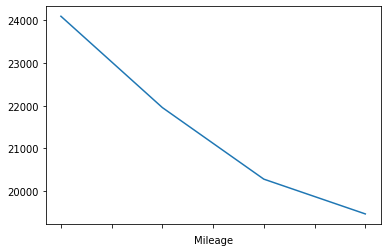

In [17]:
groups['Price'].plot.line()

In [19]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler ()

In [20]:
X =  df[['Mileage', 'Cylinder','Doors']]
y=df['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

/home/temitope/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/temitope/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
print (X)

      Mileage  Cylinder     Doors
0   -1.417485   0.52741  0.556279
1   -1.305902   0.52741  0.556279
2   -0.810128   0.52741  0.556279
3   -0.426058   0.52741  0.556279
4    0.000008   0.52741  0.556279
..        ...       ...       ...
799 -0.439853   0.52741  0.556279
800 -0.089966   0.52741  0.556279
801  0.079605   0.52741  0.556279
802  0.750446   0.52741  0.556279
803  1.932565   0.52741  0.556279

[804 rows x 3 columns]


In [23]:
est =sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              18.11
Date:                Fri, 31 Jul 2020   Prob (F-statistic):                    2.23e-11
Time:                        10:29:40   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     801   BIC:                                  1.843e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The table of coefficients above gives us the values to plug into an equation of form: B0 + B1 * Mileage + B2 * cylinders + B3 * doors

##### The above result imploes that Mileage and doors have a negative effect of the price due to the negative coefficient while the cylinder has a positive effect

# MAke a prediction with the model

In [24]:
scaled = scale.transform([[45000, 8, 4]])
print (scaled)
predictied =est.predict(scaled[0])
print (predicted)

[[3.07256589 1.96971667 0.55627894]]


NameError: name 'predicted' is not defined